# **<h1 align='center'>Prediction of Credit Card Approval**

<h2>Project Guideline</h2>

- Tujuannya adalah untuk menentukan nasabah yang akan di approve pengajuan creditnya
- Cleaning data (membersihkan data kotor)
- Exploratory Data Analysis (Menampilkan Insight atau informasi penting dari data menggunakan visualisasi, untuk masing-masing visualisasi diberi penjelasan singkat)
- Data preprocessing (split data, standardization)
- Modelling (Bebas menggunakan algoritma apapun, bebas explore algoritma dari github, paper dsb, minimal menggunakan 2 model)
- Menampilkan evaluasi model (Akurasi, recall, precision,f1-score)
- Semakin banyak insight maka akan semakin bagus
- Record penjelasan project maks 15 menit (insight, data processing & modelling)

<h2>Outline</h2>

- Load Data Set
- Data Cleaning
- Exploratory Data Analysis
- Create Model
- Test Model
- Summary

## **Load Data Set**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read csv file to create data frame
df = pd.read_csv('drive/MyDrive/Data For Colab/creditcardmarketing-bbm.csv')

# Display the data for general understanding and perform simple analysis
df.head(5)

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [ ]:
# Get a summary about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Number       18000 non-null  int64  
 1   Offer Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer Type           18000 non-null  object 
 4   Income Level          18000 non-null  object 
 5   # Bank Accounts Open  18000 non-null  int64  
 6   Overdraft Protection  18000 non-null  object 
 7   Credit Rating         18000 non-null  object 
 8   # Credit Cards Held   18000 non-null  int64  
 9   # Homes Owned         18000 non-null  int64  
 10  Household Size        18000 non-null  int64  
 11  Own Your Home         18000 non-null  object 
 12  Average Balance       17976 non-null  float64
 13  Q1 Balance            17976 non-null  float64
 14  Q2 Balance            17976 non-null  float64
 15  Q3 Balance         

In [ ]:
# Get a statistical summary of each column
df.describe(include='all')

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000.000000,18000,18000,18000,18000,18000.000000,18000,18000,18000.000000,18000.000000,18000.000000,18000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
unique,NaN,2,3,2,3,NaN,2,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Air Miles,Postcard,Medium,NaN,No,High,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
freq,NaN,16977,6061,9147,9013,NaN,15322,6071,NaN,NaN,NaN,11655,NaN,NaN,NaN,NaN,NaN
mean,9000.500000,NaN,NaN,NaN,NaN,1.255778,NaN,NaN,1.903500,1.203444,3.499056,NaN,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,NaN,NaN,NaN,NaN,0.472501,NaN,NaN,0.797009,0.427341,1.114182,NaN,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,3.000000,NaN,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,3.000000,NaN,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,4.000000,NaN,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000


In [ ]:
# Identify column with missing value
missing_values = df[df.columns[df.isna().sum() > 0]]

print('Columns with missing value:')
print(missing_values.isna().sum())

Columns with missing value:
Average Balance    24
Q1 Balance         24
Q2 Balance         24
Q3 Balance         24
Q4 Balance         24
dtype: int64


In [ ]:
# Identify total missing and duplicated value
print('Total missing value :', df.isna().sum().sum())
print('Total duplicated value :', df.duplicated().sum())

Total missing value : 120
Total duplicated value : 0


In [ ]:
# Rename columns for easier workflow
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("#", "Num")

## **Data Cleaning**

**<h3>Handling missing value**

Dealing with missing values can help maintain the quality of the data. This can be accomplished through replacing or just drop it directly. In this case, the missing values is small relative to the overall data set, replacing or removing them will not have significant impact, dropping them may be the simplest solution.


In [ ]:
# Remove missing value
df = df.dropna()

# Recheck the missing value
print('Total missing value :', df.isna().sum().sum())

Total missing value : 0


In [ ]:
df.describe()

,Customer_Number,Num_Bank_Accounts_Open,Num_Credit_Cards_Held,Num_Homes_Owned,Household_Size,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,8999.727192,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.958865,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4498.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13501.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


## **Exploratory Data Analysis**

**<h3>Identify data set Attributes/columns**

**Binary** : Offer Accepted, Overdraft Protection, Own Your Home.


**Number** : # Bank Accounts Open, # Credit Cards Held, # Homes Owned, Household Size, Average Balance, Q1 - Q4 Balance.

 **Catagory** : Income Level, Credit Rating, Reward, Mailer Type.

In [ ]:
# Display clean data frame
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Num_Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Num_Credit_Cards_Held,Num_Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Q1_Balance,Q2_Balance,Q3_Balance,Q4_Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


**Note:** Checking the class distribution on the target label

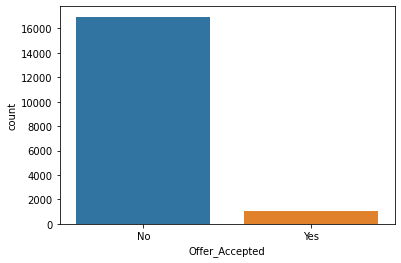

No     16955
Yes     1021
Name: Offer_Accepted, dtype: int64


In [ ]:
# Check class distribution
sns.countplot(data=df, x='Offer_Accepted')
plt.show()

# Display number distribution for each class
print(df['Offer_Accepted'].value_counts())

**Data Distribution**

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features.

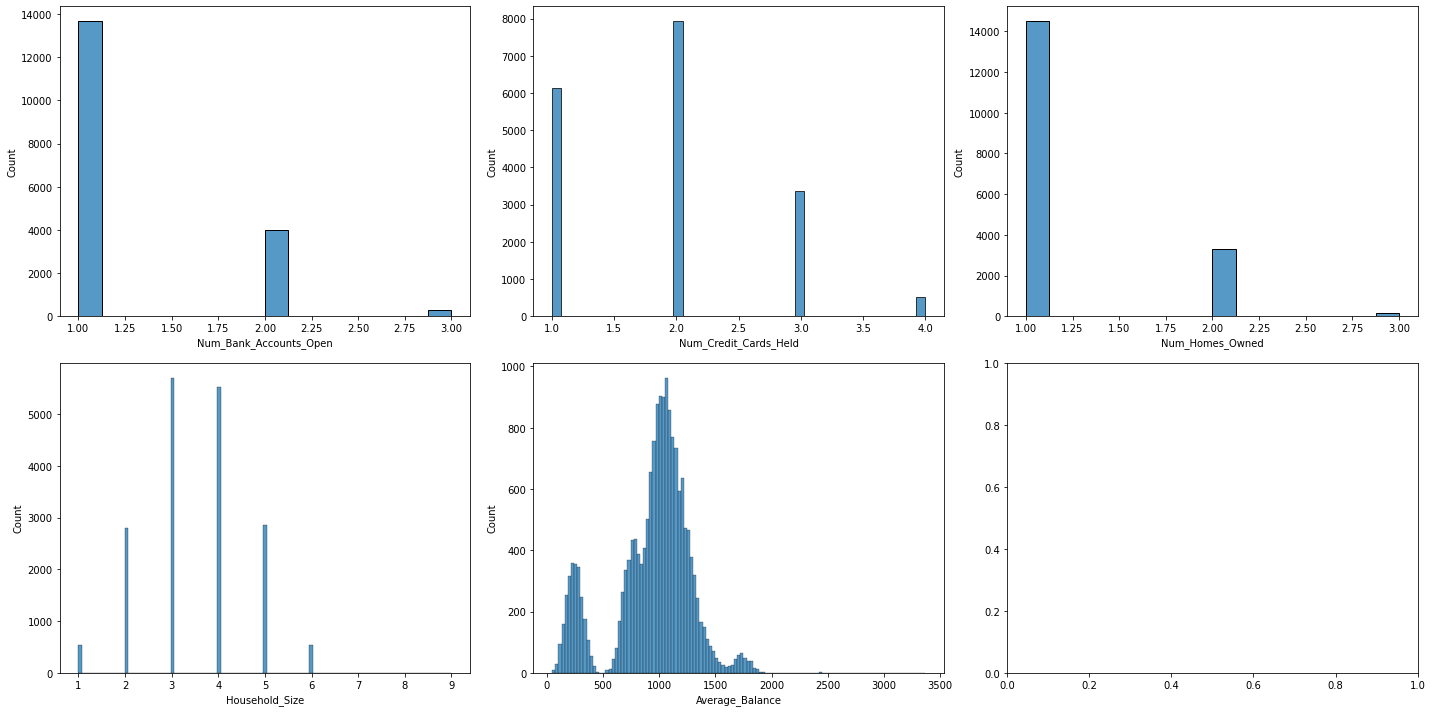

In [ ]:
# Select the columns to plot
columns = ['Num_Bank_Accounts_Open', 'Num_Credit_Cards_Held',
       'Num_Homes_Owned', 'Household_Size', 'Average_Balance']

# Create a 2x3 subplot grid
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=ax[i])
    
# Show the plot
plt.tight_layout()
plt.show()

**<h3>Identify Outliers**

We use boxplot to identify extreme outliers that are out of 25-75 quartile.



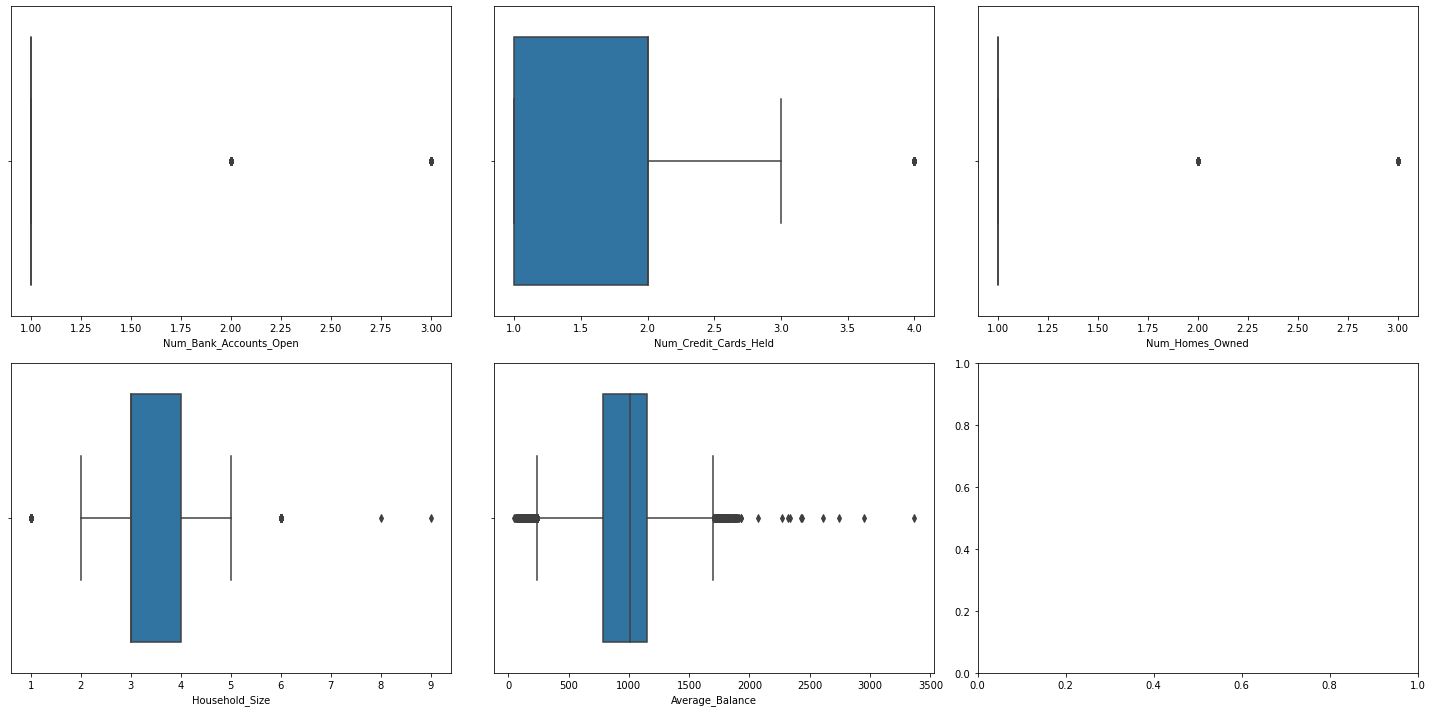

In [ ]:
# Create a 2x3 subplot grid
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax = ax.flatten()

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=ax[i])
    
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# See the distribution of the data using distribution plot
# sns.histplot(df['Average_Balance'], kde=True)
# plt.title('Average Balance Distribution')
# plt.show()

**<h3>Find correlation between features**

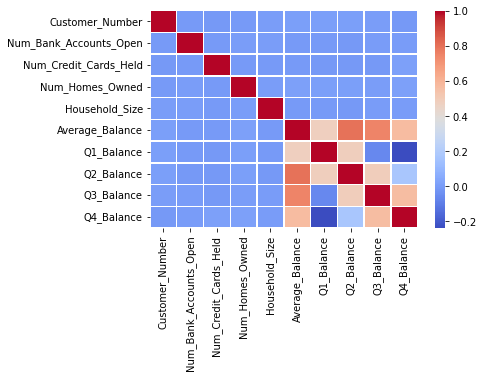

In [ ]:
# Visualize the correlation between features using heatmap
sns.heatmap(df.corr(), linewidth=.5, cmap='coolwarm')
plt.show()

We are going to explore the type of customers who are most likely to get approved.

We can see some trend from this visualization. People who got low credit rating are more likely to get aprroved.

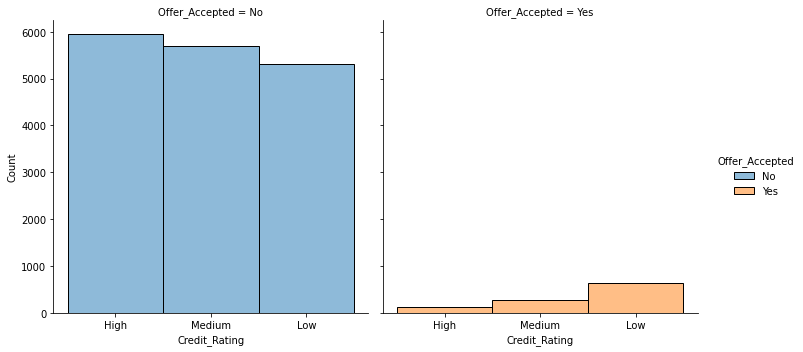

In [ ]:
sns.displot(df, x='Credit_Rating', hue='Offer_Accepted', col='Offer_Accepted')
plt.show()

And from this visualization we can say that people who got approve are more in the range low-medium income.

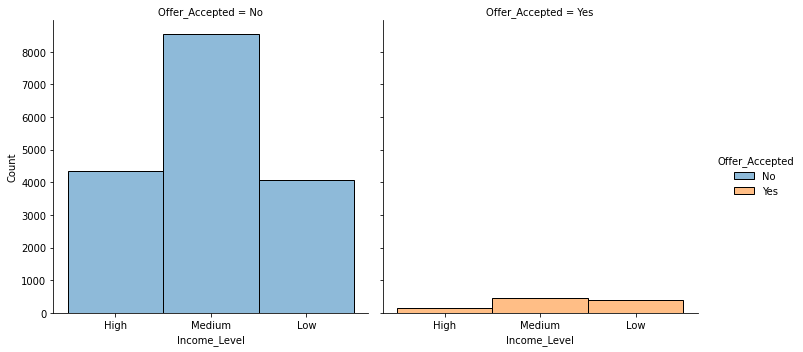

In [ ]:
sns.displot(df, x='Income_Level', hue='Offer_Accepted', col='Offer_Accepted')
plt.show()

## **Data Preprocessing**

**<h3>Drop features**

Irrelevant features do not have any impact or meaningful information on the model. In this case, `'Customer_Number'` is irrelevant as it is just a unique identifier for each customer.

Features that are highly correlated with other features are considered less important as they may not provide additional information. In this case, removing `Q1 - Q4_Balance` will not have a significant effect on the model as they are highly correleted with `Average_Balance`

In [ ]:
# Drop Customer Number column
df = df.drop(columns=['Customer_Number'])

# Drop Q1 - Q4_Balance
df = df.drop(columns=['Q1_Balance', 'Q2_Balance', 'Q3_Balance', 'Q4_Balance'])

**<h3>Handling outliers**

In [ ]:
# Calculate IQR
Q1 = df['Average_Balance'].quantile(0.25)
Q3 = df['Average_Balance'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[(df['Average_Balance'] >= Q1 - 1.5 * IQR) & (df['Average_Balance'] <= Q3 + 1.5 * IQR)]

In [ ]:
# Remove outliers
df = df[(df['Household_Size'] <= 6)]

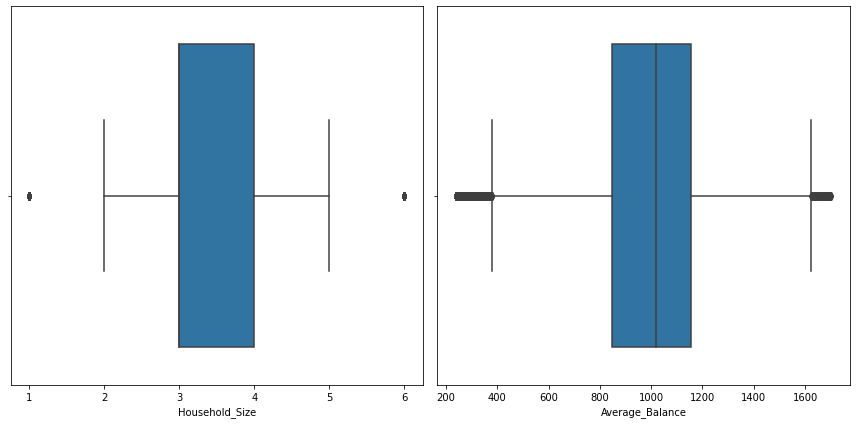

In [ ]:
columns = ['Household_Size', 'Average_Balance']

# Create a 1x2 subplot grid
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax = ax.flatten()

# Loop over the columns and plot each column on a separate axis
for i, col in enumerate(columns):
    sns.boxplot(data=df, x=col, ax=ax[i])
    
# Show the plot
plt.tight_layout()
plt.show()

**<h3>Turning catagorical value**

Some machine learning algorithms are designed to work with numerical data and can't handling categorical data directly. So, it is best practice to encode the categorical data first. It is also important to consider the encoding method, as different encoding techniques can have an impact on the results of a model.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Binary features
df['Offer_Accepted'] = le.fit_transform(df['Offer_Accepted'])
df['Overdraft_Protection'] = le.fit_transform(df['Overdraft_Protection'])
df['Own_Your_Home'] = le.fit_transform(df['Own_Your_Home'])

# Nominal
df = pd.get_dummies(df, columns=['Reward', 'Mailer_Type'])

# Ordinal
df['Income_Level'] = df['Income_Level'].map({'High': 2, 'Medium': 1, 'Low': 0})
df['Credit_Rating'] = df['Credit_Rating'].map({'High': 2, 'Medium': 1, 'Low': 0})

In [ ]:
# Recheck data frame
df

,Offer_Accepted,Income_Level,Num_Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Num_Credit_Cards_Held,Num_Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard
0,0,2,1,0,2,2,1,4,0,1160.75,1,0,0,1,0
2,0,2,2,0,1,2,1,2,1,276.50,1,0,0,0,1
3,0,1,2,0,2,1,1,4,0,1219.00,1,0,0,1,0
4,0,1,1,0,1,2,1,6,1,1211.00,1,0,0,1,0
5,0,1,1,0,2,3,1,4,0,1114.75,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,0,1,1,0,0,2,1,2,1,985.25,1,0,0,0,1
17996,0,2,1,0,0,3,1,3,1,850.50,0,1,0,1,0
17997,0,2,1,0,0,2,1,4,0,1087.25,0,1,0,1,0
17998,0,1,1,0,1,4,2,2,1,1022.25,0,1,0,1,0


**<h3>Normalization data / Feature scaling</h3>**

Normalization can prevent one feature dominating the others and can ensure that the optimization process is more stable. Common used techniques are min-max scaling and standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Selecting columns to scale
selected_col = ['Num_Bank_Accounts_Open', 'Num_Credit_Cards_Held', 'Num_Homes_Owned', 'Household_Size', 'Average_Balance']

# Fit and transform the data
df[selected_col] = scaler.fit_transform(df[selected_col])

**<h3>Split data</h3>**

An important step in testing model is to split the data into training and testing data. We will assign the features data as `X` and target data as `y`

In [ ]:
# df.columns

# , 'Num_Bank_Accounts_Open', 'Num_Homes_Owned'

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Offer_Accepted'])
y = df['Offer_Accepted']

# Randomly split the data for training and testing using the function train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
df

,Offer_Accepted,Income_Level,Num_Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Num_Credit_Cards_Held,Num_Homes_Owned,Household_Size,Own_Your_Home,Average_Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard
0,0,2,-0.541063,0,2,0.120083,-0.475180,0.451989,0,0.647183,1,0,0,1,0
2,0,2,1.585378,0,1,0.120083,-0.475180,-1.347260,1,-2.504226,1,0,0,0,1
3,0,1,1.585378,0,2,-1.135742,-0.475180,0.451989,0,0.854782,1,0,0,1,0
4,0,1,-0.541063,0,1,0.120083,-0.475180,2.251237,1,0.826271,1,0,0,1,0
5,0,1,-0.541063,0,2,1.375908,-0.475180,0.451989,0,0.483242,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17994,0,1,-0.541063,0,0,0.120083,-0.475180,-1.347260,1,0.021713,1,0,0,0,1
17996,0,2,-0.541063,0,0,1.375908,-0.475180,-0.447636,1,-0.458528,0,1,0,1,0
17997,0,2,-0.541063,0,0,0.120083,-0.475180,0.451989,0,0.385234,0,1,0,1,0
17998,0,1,-0.541063,0,1,2.631733,1.869381,-1.347260,1,0.153578,0,1,0,1,0


**<h3>Resampling data</h3>**

We should always check distribution of the target class as it can effect the performance of a model. We can perform `Under-sampling` or `Over-sampling` to handle imbalance data

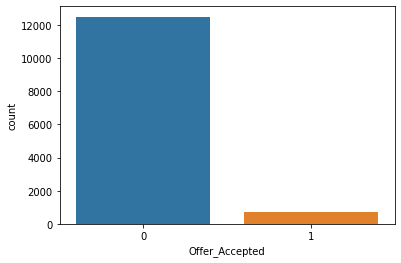

0    12500
1      727
Name: Offer_Accepted, dtype: int64


In [ ]:
# Check class distribution
sns.countplot(x=y_train)
plt.show()

# Display number distribution for each class
print(y_train.value_counts())

Over-sampling is a technique in machine learning where the minority class is randomly duplicated to increase the number of samples in the minority class. In this case, we are using Synthetic Minority Oversampling Technique (`SMOTE`).

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

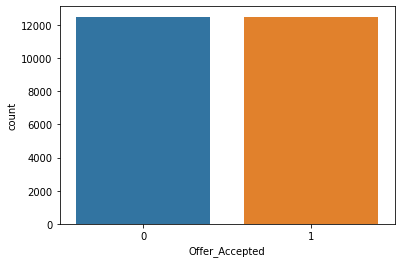

0    12500
1    12500
Name: Offer_Accepted, dtype: int64


In [ ]:
# Recheck class distribution
sns.countplot(x=y_smote)
plt.show()

print(y_smote.value_counts())

## **Test Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, roc_auc_score

**<h3>Find the best algorithm**

After balancing the target class, now we can test the data set using multiple algorithm to find the best model.

In [ ]:
# Create a list of algorithms
algorithms = [
    GradientBoostingClassifier(),
    LogisticRegression(),
    GaussianNB(),
    SVC(),
]

- Prediction using resample model

In [ ]:
# Initialize variables to store results of loop
results = []

# Using loop to evaluate each algorithm
for algorithm in algorithms:
    algorithm.fit(X_smote, y_smote)
    y_pred = algorithm.predict(X_test)
    results.append({
        'Algorithm': type(algorithm).__name__,
        'F1_score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    })

# Store the result into a data frame
smote_result = pd.DataFrame(results, columns=['Algorithm', 'F1_score', 'Precision', 'Recall', 'Accuracy'])

# Sort the result by the highest F1_score
smote_result = smote_result.sort_values(by=['F1_score'], ascending=False)

# Display the result on data frame
smote_result

,Algorithm,F1_score,Precision,Recall,Accuracy
0,GradientBoostingClassifier,0.261603,0.184524,0.449275,0.841246
1,LogisticRegression,0.248031,0.155748,0.608696,0.768975
3,SVC,0.228070,0.147518,0.502415,0.787118
2,GaussianNB,0.225833,0.135742,0.671498,0.711823


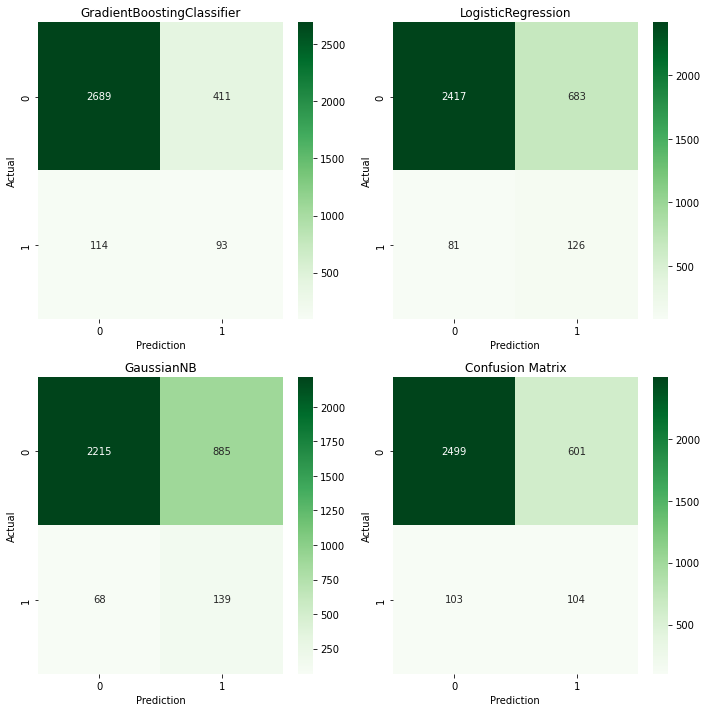

In [ ]:
# Set a list of algorithms to be plotted
plot_algorithms = algorithms

# Create a subplot for each algorithm
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

# Plot the confusion matrix for each algorithm
for ax, algorithm in zip(axs, algorithms):
    y_pred = algorithm.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Greens', ax=ax)
    ax.set_title(type(algorithm).__name__)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Actual')

# Adjust the subplot spacing
plt.tight_layout()

# Show the plot
plt.title("Confusion Matrix")
plt.show()

- Prediction using Cost-sensitive learning

In [ ]:
# Initialize variables to store results of loop
results = []

# Set the sample weights to penalize misclassification of the minority class
sample_weights = [10 if i == 1 else 1 for i in y_train]

# Using loop to evaluate each algorithm
for algorithm in algorithms:
    algorithm.fit(X_train, y_train, sample_weight=sample_weights)
    y_pred = algorithm.predict(X_test)
    results.append({
        'Algorithm': type(algorithm).__name__,
        'F1_score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    })

# Store the result into a data frame
csl_result = pd.DataFrame(results, columns=['Algorithm', 'F1_score', 'Precision', 'Recall', 'Accuracy'])

# Sort the result by the highest F1_score
csl_result = csl_result.sort_values(by=['F1_score'], ascending=False)

# Display the result on data frame
csl_result

,Algorithm,F1_score,Precision,Recall,Accuracy
1,LogisticRegression,0.283293,0.189015,0.565217,0.820986
0,GradientBoostingClassifier,0.256098,0.171289,0.507246,0.815543
2,GaussianNB,0.249497,0.157560,0.599034,0.774418
3,SVC,0.240385,0.160000,0.483092,0.808890


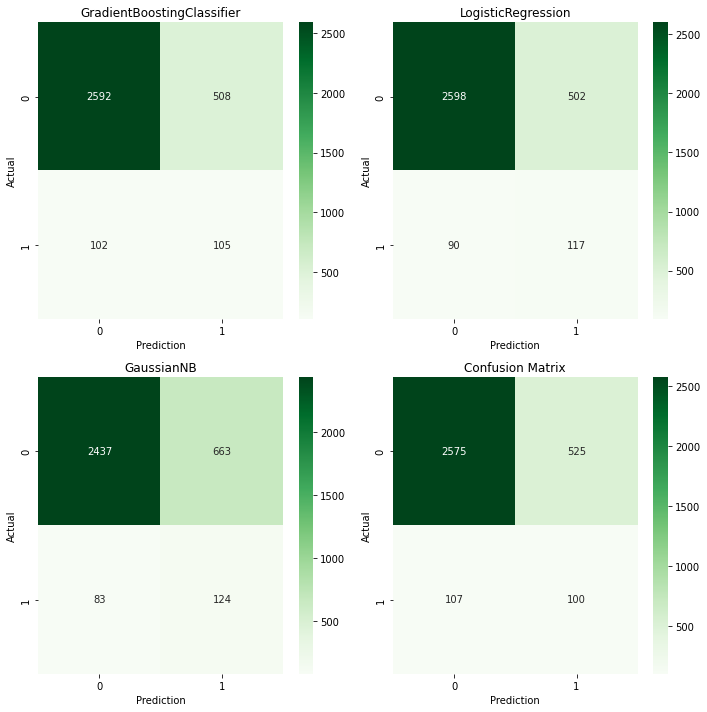

In [ ]:
# Create a subplot for each algorithm
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

# Plot the confusion matrix for each algorithm
for ax, algorithm in zip(axs, algorithms):
    y_pred = algorithm.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Greens', ax=ax)
    ax.set_title(type(algorithm).__name__)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Actual')

# Adjust the subplot spacing
plt.tight_layout()

# Show the plot
plt.title("Confusion Matrix")
plt.show()

## **Report / Summary**

- `Accuracy` may not be the most appropriate evaluation metric in this prediction due to the highly imbalanced class distribution in the data. The `F1 score` and `precision` are more suitable in this case, as we aim to maximize credit card approvals and avoid approving individuals who are not eligible (Avoid high False Positive rate).
- `Cost-sensitive learning` is a more effective approach than over-sampling
- The best algorithm is `Gradient Boosting Classifier` when using a balanced dataset, but if we apply cost-sensitive learning to the baseline dataset, `Logistic Regression` is the best algorithm, with a higher F1 score than the balanced dataset.
- `Oversample` is better compared to Undersample in every algorithms.resampling.
- Handling `outliers` does not significantly impact the results.
- `Balancing` the data prior to splitting it into training and testing sets can enhance the performance of evaluation metrics, but it may not be practical since the data shows that there will always be more individuals who are rejected than approved.
- Normalizing the data can affect the model. In this case, `StandardScaler` is the best scaler when compared to other scaling methods.

# **Author**

**Refnhaldy Kristian** created this notebook as part of portfolio project.

- <a href='https://www.linkedin.com/in/refnhaldykristian/'>Linkedin</a>
- <a href='https://github.com/refnhaldy'>Github</a>